### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
!pip install wget
!pip install gdown

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9616664fb598cdaa8734238ae3444f0ce7abdc89c3542bb2a89f9306aec8aa05
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# shashank_df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv');
import gdown
import pandas as pd

# Provide the direct download link to the CSV file
file_url = 'https://drive.google.com/uc?export=download&id=1stQnVxJcekwKSp-xYBjp5g8cudA99m4B'

file_name = 'Data11.csv'

# Download the file
gdown.download(file_url, file_name, quiet=False)

# Read the CSV file
try:
    shashank_df = pd.read_csv(file_name)
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1stQnVxJcekwKSp-xYBjp5g8cudA99m4B
From (redirected): https://drive.google.com/uc?export=download&id=1stQnVxJcekwKSp-xYBjp5g8cudA99m4B&confirm=t&uuid=fce7524e-35d5-442f-b82e-02d265a09faa
To: /content/Data11.csv
100%|██████████| 184M/184M [00:01<00:00, 94.9MB/s]


In [ ]:
shashank_df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
shashank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [ ]:
df=shashank_df.drop('date',axis=1)

In [ ]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
for dt in df.columns:
    df[dt]=df[dt].str.replace(',','.').astype(float)

In [ ]:
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


In [ ]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

### Normalizing Data and Removing Outliers

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
scaler = StandardScaler()

features_to_normalize = df.columns[:-2]
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
threshold = 3
df = df[(abs_z_scores < threshold).all(axis=1)]


### Heatmap

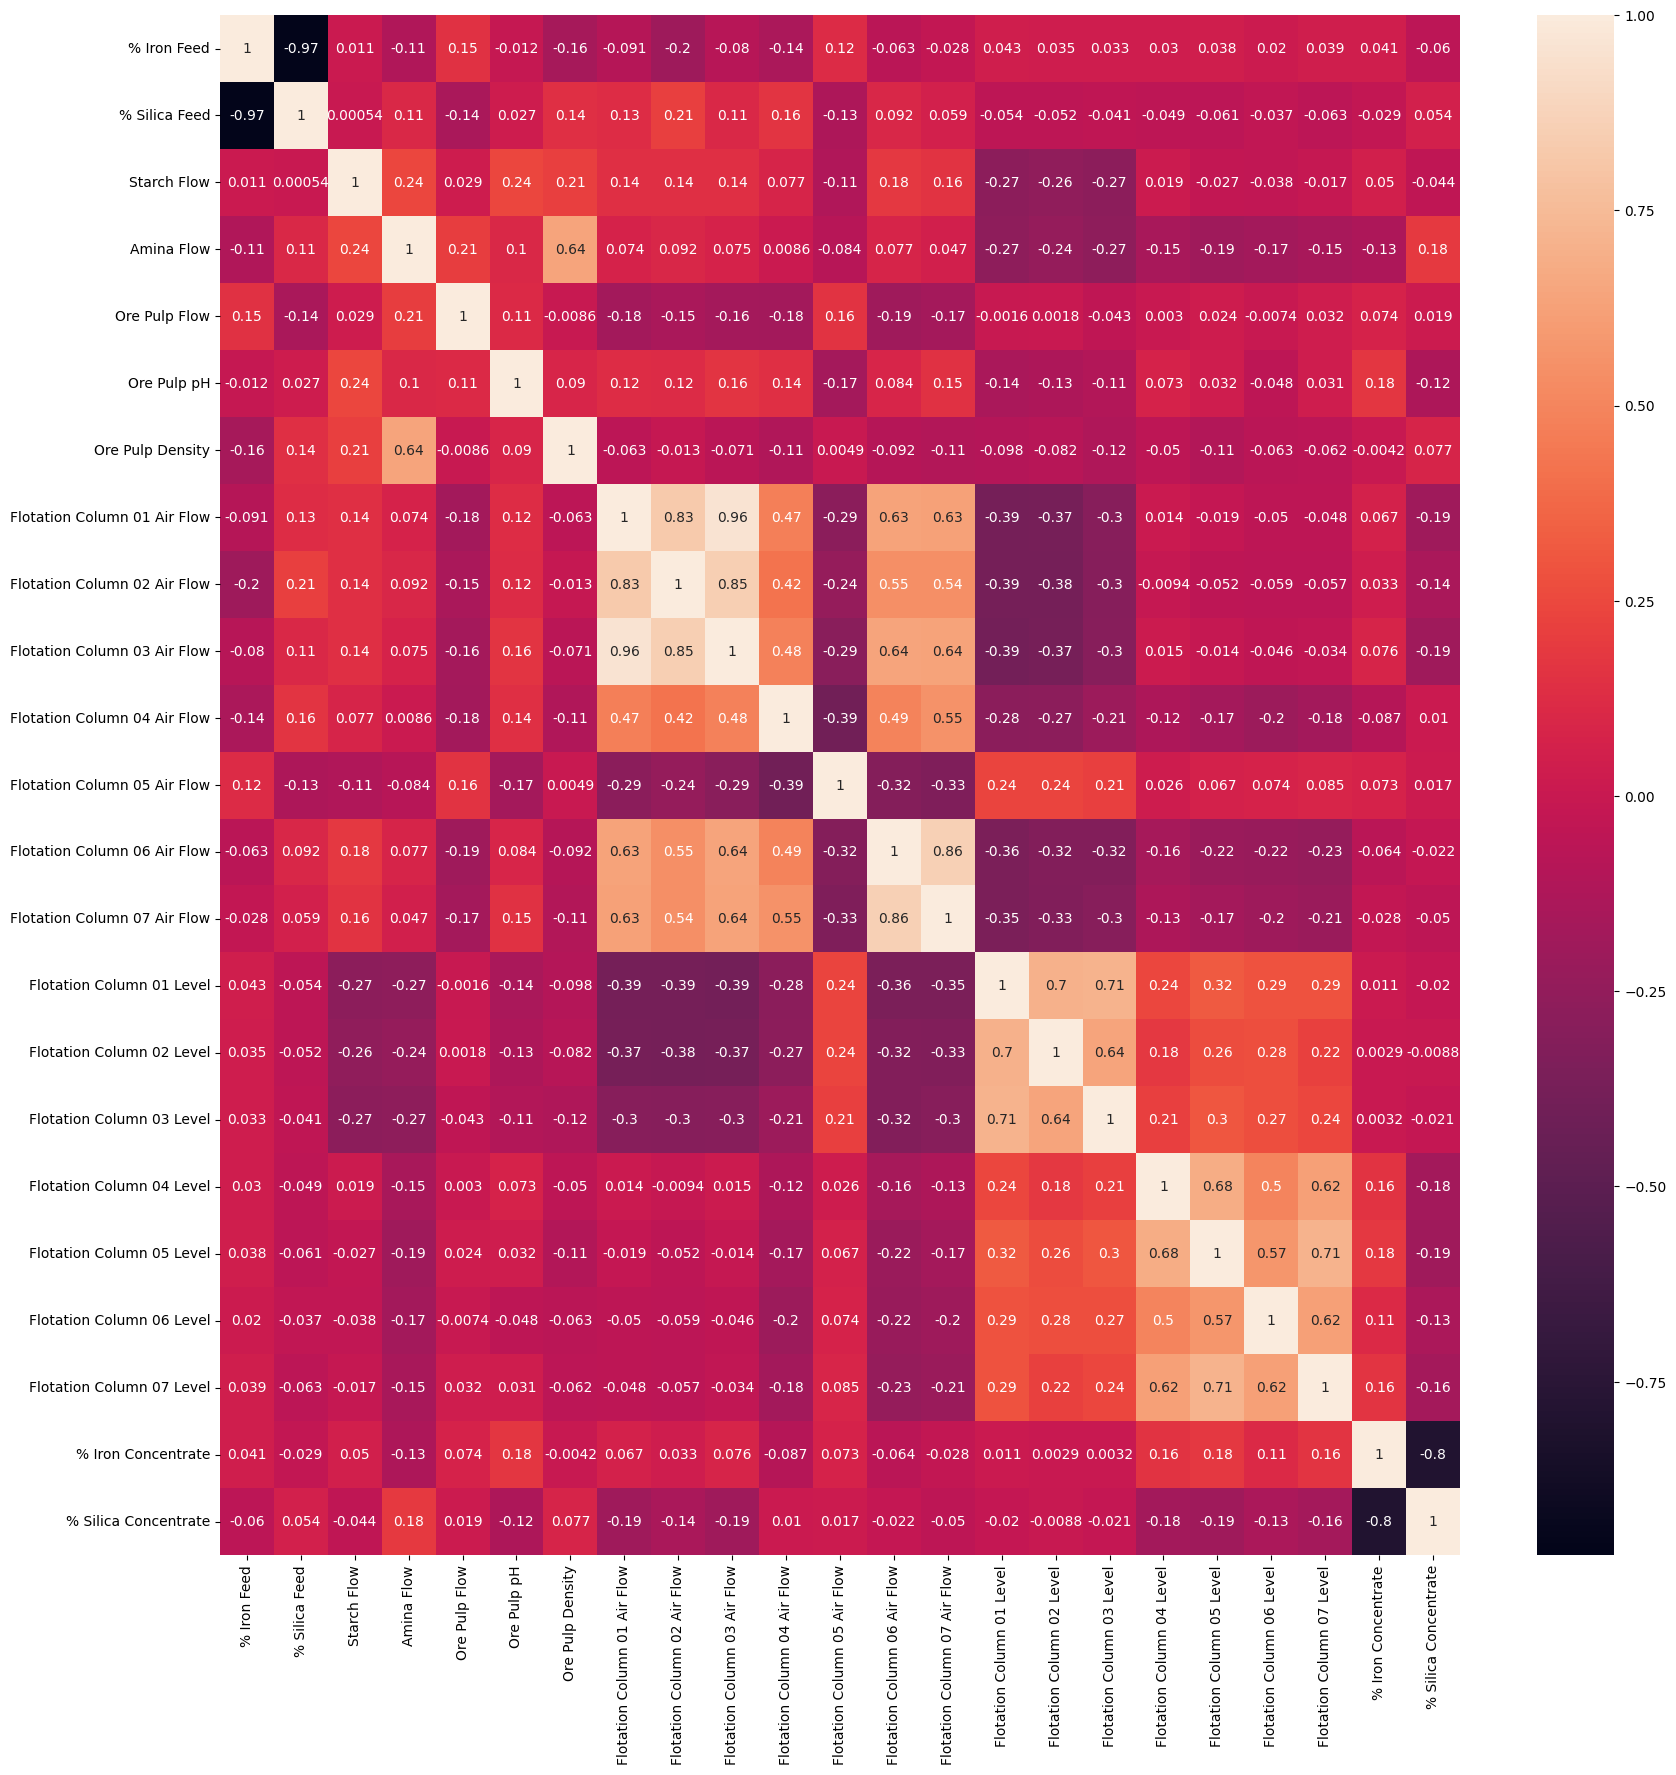

In [ ]:
plt.figure(figsize=(20, 20));
sn.heatmap(df.corr(), annot=True);
plt.show()

In [ ]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

### Different Plots

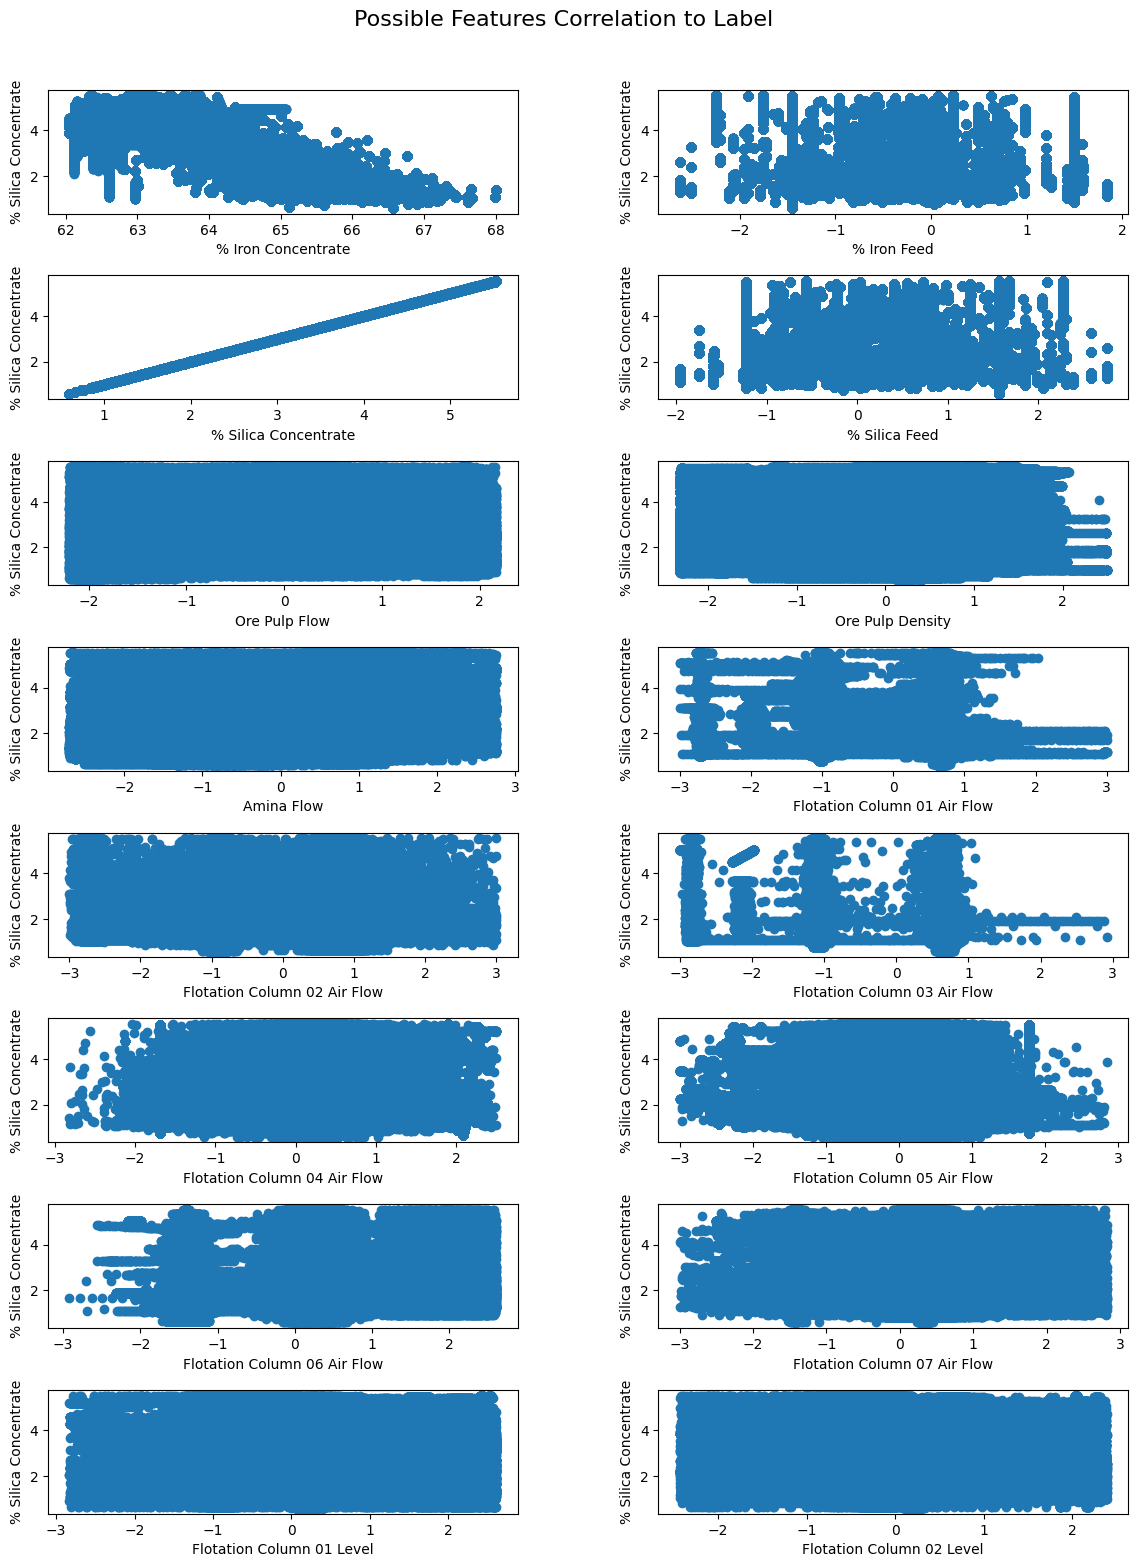

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(12, 16))

fig.suptitle('Possible Features Correlation to Label', fontsize=16, y=0.99)
features = [
    '% Iron Concentrate', '% Iron Feed',
    '% Silica Concentrate', '% Silica Feed',
    'Ore Pulp Flow', 'Ore Pulp Density',
    'Amina Flow',
    'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
    'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
    'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level', 'Flotation Column 02 Level',
    'Flotation Column 04 Level'
]
for i in range(8):
    for j in range(2):
        index = i * 2 + j
        if index < len(features):
            feature = features[index]
            axs[i, j].scatter(df[feature], df['% Silica Concentrate'])
            axs[i, j].set_xlabel(feature)
            axs[i, j].set_ylabel('% Silica Concentrate')

fig.subplots_adjust(top=0.94, bottom=0.05, left=0.07, right=0.97, hspace=0.5, wspace=0.3)
plt.show()


In [ ]:
## As we can see that some of the columns does not have any of sillica concentrate so we will drop all those columns

df.columns
droplist=['% Iron Feed','Starch Flow',\
          'Ore Pulp pH','Flotation Column 02 Air Flow',\
          'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',\
          'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',\
          'Flotation Column 07 Air Flow', 'Flotation Column 04 Level',
          'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 05 Level',
          'Flotation Column 06 Level', 'Flotation Column 07 Level',]

df=df.drop(droplist,axis=1)
df.shape

(717888, 8)

In [ ]:
df.columns

Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 01 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [ ]:
df['% Iron Concentrate_power2']=df['% Iron Concentrate']**2

df

,% Silica Feed,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 01 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate_power2
0,0.342021,0.759497,-0.192311,0.860958,-1.044447,-0.479708,66.91,1.31,4476.9481
1,0.342021,0.831085,-0.020142,0.860958,-1.027399,-0.521726,66.91,1.31,4476.9481
2,0.342021,0.875906,0.215431,0.860958,-1.026656,-0.526695,66.91,1.31,4476.9481
3,0.342021,0.882603,0.037179,0.860958,-1.020714,-0.517528,66.91,1.31,4476.9481
4,0.342021,0.767532,0.275844,0.860958,-1.011059,-0.517528,66.91,1.31,4476.9481
...,...,...,...,...,...,...,...,...,...
737448,1.255728,-0.516195,-1.134910,-0.385995,0.749196,-0.977636,64.27,1.71,4130.6329
737449,1.255728,-0.161226,-1.303058,-0.387872,0.771781,-0.906308,64.27,1.71,4130.6329
737450,1.255728,0.135298,-1.451824,-0.389894,0.793691,-0.849872,64.27,1.71,4130.6329
737451,1.255728,0.037304,-1.299243,-0.391916,0.756151,-0.878815,64.27,1.71,4130.6329


In [ ]:
df.columns

Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 01 Level',
       '% Iron Concentrate', '% Silica Concentrate',
       '% Iron Concentrate_power2'],
      dtype='object')

### Splitting The Data

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('% Silica Concentrate',axis=1)

y=df['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(717888,)
(574310,)
(143578,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw        X:% Silica Feed                     4.713964
Amina Flow                        5.457058
Ore Pulp Flow                     4.370409
Ore Pulp Density                  4.814958
Flotation Column 01 Air Flow      5.995676
Flotation Column 01 Level         5.442559
% Iron Concentrate                5.960000
% Iron Concentrate_power2       775.157600
dtype: float64
Peak to Peak range by column in Normalized X:[4.72172019 5.53795729 4.37819703 4.91622694 6.70511898 5.6104573
 5.36319337 5.38513683]


### Linear Regression Model (Lasso Model)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of alpha values to try
alphas = np.logspace(-4, 0, 100)

# Create Lasso regression object
lasso = Lasso()

# Create grid search
grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas), scoring='neg_mean_squared_error', cv=5)

# Fit grid search
grid.fit(X_train_norm, y_train)

# Get the best alpha
best_alpha = grid.best_estimator_.alpha
print("Best alpha:", best_alpha)

# Fit Lasso regression with best alpha
reg1 = Lasso(alpha=best_alpha)
reg1.fit(X_train_norm, y_train)
y_train_pred = reg1.predict(X_train_norm)

# Calculate metrics
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

RMSE_Col = []
R2_Col = []
RMSE_Col.append(rmse)
R2_Col.append(r2)

# Print metrics
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")








/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+04, tolerance: 5.699e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.515e+04, tolerance: 5.711e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.522e+04, tolerance: 5.702e

Best alpha: 0.0001
RMSE: 0.6404
R2: 0.6696


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.393e+04, tolerance: 7.127e+01
  model = cd_fast.enet_coordinate_descent(


### Linear Regression Model (Ridge Model)

Best alpha: 0.002595024211399737


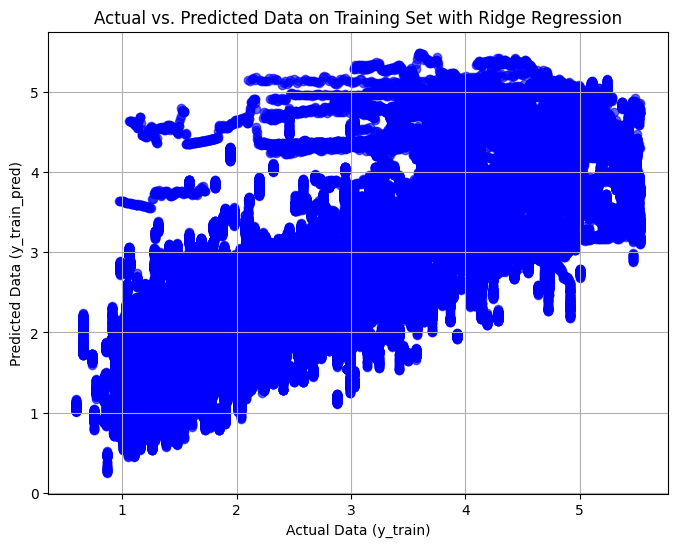

RMSE: 0.6331
R2: 0.6770


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of alpha values to try
alphas = np.logspace(-4, 0, 100)

# Create Ridge regression object
ridge = Ridge()

# Create grid search
grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas), scoring='neg_mean_squared_error', cv=5)

# Fit grid search
grid.fit(X_train_norm, y_train)

# Get the best alpha
best_alpha = grid.best_estimator_.alpha
print("Best alpha:", best_alpha)

# Fit Ridge regression with best alpha
reg2 = Ridge(alpha=best_alpha)
reg2.fit(X_train_norm, y_train)
y_train_pred = reg2.predict(X_train_norm)

# Calculate metrics
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.xlabel('Actual Data (y_train)')
plt.ylabel('Predicted Data (y_train_pred)')
plt.title('Actual vs. Predicted Data on Training Set with Ridge Regression')
plt.grid(True)
plt.show()

RMSE_Col.append(rmse)
R2_Col.append(r2)

# Print metrics
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


### Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}

# Create Random Forest Regressor
reg3 = RandomForestRegressor(random_state=77)

# Create grid search
grid_search = GridSearchCV(estimator=reg3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_norm, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Fit Random Forest Regressor with best parameters
reg3_best = RandomForestRegressor(random_state=77, **best_params)
reg3_best.fit(X_train_norm, y_train)
y_train_pred = reg3_best.predict(X_train_norm)

# Calculate metrics
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.xlabel('Actual Data (y_train)')
plt.ylabel('Predicted Data (y_train_pred)')
plt.title('Actual vs. Predicted Data on Training Set with RandomForestRegressor')
plt.grid(True)
plt.show()

RMSE_Col.append(rmse)
R2_Col.append(r2)

# Print metrics
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


KeyboardInterrupt: 

In [ ]:
print(RMSE_Col,R2_Col)

### Comparison of Different Models RMSE and R2

In [ ]:
Xgraph=['Losso','Ridge','RandomForest']

fig,axes=plt.subplots(nrows=1,ncols=2)

fig.suptitle("Scoring Result")
axes[0].bar(Xgraph,RMSE_Col)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")

axes[1].bar(Xgraph,R2_Col,color='g')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show